# Preparing Time Series from Wide-Form Data

## We will be working with Zillow's publicly available Zillow House Value Index (ZHVI)
https://www.zillow.com/research/data/

- Specifically, you will be using the Home Value data set for:
Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
Geography = "City"
- We have already downloaded the file for you and uploaded it to Google Drive.
  - Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
  - Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv
  
## Task
### Part 1
- First, you will prepare the dataset for time series analysis:
  - Load in the Zillow Home Value Index dataframe.
    - Note: it is a large file and may take a minute to load.
  - Filter the 4 largest cities into a new dataframe.
    - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
     - Therefore the 4 largest cities would have rank values of [0,1,2,3]
  - Melt the data to long-form and prepare it for time series analysis.
   - Convert the melted dates into datetime datatype.
   - Make the datetime column the index.
  - Resample the dataframe as monthly frequency, grouped by City.
  
### Part 2
- Once you've prepared the dataframe with the time series data for the 4 largest cities:
  - Plot the home values for all 4 cities. (Hint: use unstack)
    - Make sure to add a title and axis labels.
    - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
     - Hint: use the FuncFormatter from matplotlib.
- Answer the following 2 questions using pandas:
1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
   - Hint: use either pd.IndexSlice or .unstack() to get the answer.
2) How much did the home values change from November 2008 to December 2008 (in dollars)?
   - Hint: you can use .diff() to calculate the change in values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

import datetime as dt
from matplotlib.ticker import FuncFormatter

# Part 1

In [2]:
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
# Filter the 4 largest cities into a new dataframe
top_df = df.iloc[[0,1,2,3]]
top_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [14]:
# Change dataframe to long-form and keep only items we need
melted = pd.melt(top_df.drop(columns=['RegionID','RegionType', 'StateName', 'Metro', 'CountyName','SizeRank']),
                 id_vars=['RegionName', 'State'],
                value_name='House Value',var_name="Date")
melted

,RegionName,State,Date,House Value
0,New York,NY,2000-01-31,253690.0
1,Los Angeles,CA,2000-01-31,234181.0
2,Houston,TX,2000-01-31,109068.0
3,Chicago,IL,2000-01-31,166139.0
4,New York,NY,2000-02-29,255517.0
...,...,...,...,...
1087,Chicago,IL,2022-08-31,315587.0
1088,New York,NY,2022-09-30,781622.0
1089,Los Angeles,CA,2022-09-30,966595.0
1090,Houston,TX,2022-09-30,272639.0


In [15]:
# Convert Date cloumn to datetime objects
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionName   1092 non-null   object        
 1   State        1092 non-null   object        
 2   Date         1092 non-null   datetime64[ns]
 3   House Value  1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.2+ KB


In [16]:
# Make the datetime column the index.
melted = melted.set_index("Date")
melted

,RegionName,State,House Value
Date,,,
2000-01-31,New York,NY,253690.0
2000-01-31,Los Angeles,CA,234181.0
2000-01-31,Houston,TX,109068.0
2000-01-31,Chicago,IL,166139.0
2000-02-29,New York,NY,255517.0
...,...,...,...
2022-08-31,Chicago,IL,315587.0
2022-09-30,New York,NY,781622.0
2022-09-30,Los Angeles,CA,966595.0


In [17]:
# Resample the dataframe as monthly frequency, grouped by City.
df_ts = melted.groupby('RegionName').resample("M").asfreq()
df_ts

RegionName State  House Value
RegionName Date                                    
Chicago    2000-01-31    Chicago    IL     166139.0
           2000-02-29    Chicago    IL     166536.0
           2000-03-31    Chicago    IL     167368.0
           2000-04-30    Chicago    IL     168826.0
           2000-05-31    Chicago    IL     170499.0
...                          ...   ...          ...
New York   2022-05-31   New York    NY     768797.0
           2022-06-30   New York    NY     773944.0
           2022-07-31   New York    NY     777692.0
           2022-08-31   New York    NY     779960.0
           2022-09-30   New York    NY     781622.0

[1092 rows x 3 columns]

## Part 2


In [18]:
# Plot the home values for all 4 cities
df_unstacked = df_ts.unstack(0)
df_unstacked

RegionName                                   State          \
RegionName    Chicago  Houston  Los Angeles  New York Chicago Houston   
Date                                                                    
2000-01-31    Chicago  Houston  Los Angeles  New York      IL      TX   
2000-02-29    Chicago  Houston  Los Angeles  New York      IL      TX   
2000-03-31    Chicago  Houston  Los Angeles  New York      IL      TX   
2000-04-30    Chicago  Houston  Los Angeles  New York      IL      TX   
2000-05-31    Chicago  Houston  Los Angeles  New York      IL      TX   
...               ...      ...          ...       ...     ...     ...   
2022-05-31    Chicago  Houston  Los Angeles  New York      IL      TX   
2022-06-30    Chicago  Houston  Los Angeles  New York      IL      TX   
2022-07-31    Chicago  Houston  Los Angeles  New York      IL      TX   
2022-08-31    Chicago  Houston  Los Angeles  New York      IL      TX   
2022-09-30    Chicago  Houston  Los Angeles  New York      IL      TX   

                                House Value                                  
RegionName Los Angeles New York     Chicago   Houston Los Angeles  New York  
Date                                                                         
2000-01-31          CA       NY    166139.0  109068.0    234181.0  253690.0  
2000-02-29          CA       NY    166536.0  109079.0    234401.0  255517.0  
2000-03-31          CA       NY    167368.0  108878.0    235513.0  257207.0  
2000-04-30          CA       NY    168826.0  108881.0    237589.0  260310.0  
2000-05-31          CA       NY    170499.0  108834.0    240113.0  263204.0  
...                ...      ...         ...       ...         ...       ...  
2022-05-31          CA       NY    312487.0  265558.0    990391.0  768797.0  
2022-06-30          CA       NY    314663.0  268901.0    992337.0  773944.0  
2022-07-31          CA       NY    315910.0  271059.0    992630.0  777692.0  
2022-08-31          CA       NY    315587.0  272400.0    978196.0  779960.0  
2022-09-30          CA       NY    315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

In [19]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)

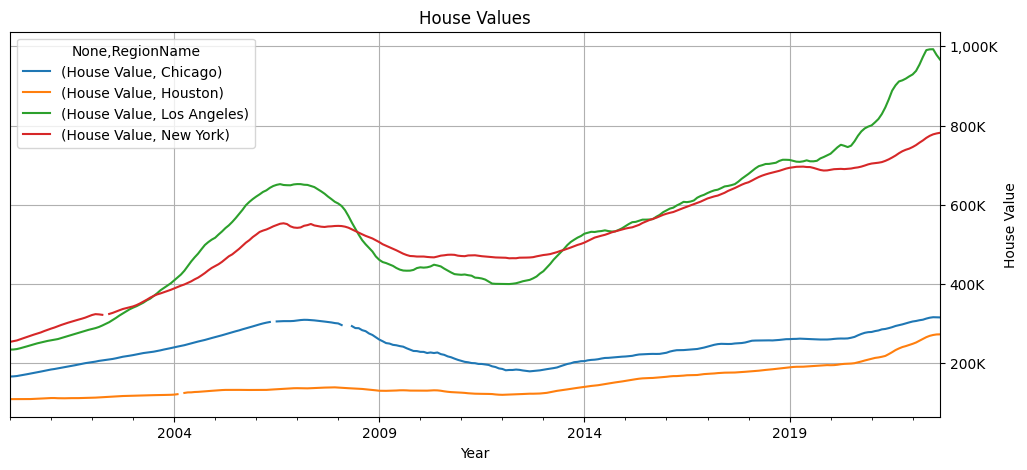

In [20]:
ax = df_unstacked.plot(figsize=(12,5))
ax.yaxis.set_major_formatter(fmt_thous)
ax.yaxis.tick_right()
ax.set_title('House Values');
ax.set_xlabel('Year')
ax.set_ylabel('House Value')
ax.yaxis.set_label_position("right")
ax.grid(True)

## Answer the following 2 questions using pandas:



1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [26]:
results = df_ts.loc[pd.IndexSlice[:, '2008'],:]
results

RegionName State  House Value
RegionName  Date                                      
Chicago     2008-01-31      Chicago    IL     300207.0
            2008-02-29      Chicago    IL     296063.0
            2008-03-31      Chicago    IL          NaN
            2008-04-30      Chicago    IL          NaN
            2008-05-31      Chicago    IL     293467.0
            2008-06-30      Chicago    IL     288495.0
            2008-07-31      Chicago    IL     288174.0
            2008-08-31      Chicago    IL     283199.0
            2008-09-30      Chicago    IL     280695.0
            2008-10-31      Chicago    IL     274849.0
            2008-11-30      Chicago    IL     271059.0
            2008-12-31      Chicago    IL     265306.0
Houston     2008-01-31      Houston    TX     138208.0
            2008-02-29      Houston    TX     137512.0
            2008-03-31      Houston    TX     136795.0
            2008-04-30      Houston    TX     136628.0
            2008-05-31      Houston    TX     136228.0
            2008-06-30      Houston    TX     135773.0
            2008-07-31      Houston    TX     135392.0
            2008-08-31      Houston    TX     134770.0
            2008-09-30      Houston    TX     133932.0
            2008-10-31      Houston    TX     133189.0
            2008-11-30      Houston    TX     132247.0
            2008-12-31      Houston    TX     131283.0
Los Angeles 2008-01-31  Los Angeles    CA     603029.0
            2008-02-29  Los Angeles    CA     596635.0
            2008-03-31  Los Angeles    CA     586065.0
            2008-04-30  Los Angeles    CA     571226.0
            2008-05-31  Los Angeles    CA     554589.0
            2008-06-30  Los Angeles    CA     539622.0
            2008-07-31  Los Angeles    CA     524220.0
            2008-08-31  Los Angeles    CA     510520.0
            2008-09-30  Los Angeles    CA     500124.0
            2008-10-31  Los Angeles    CA     490979.0
            2008-11-30  Los Angeles    CA     481905.0
            2008-12-31  Los Angeles    CA     469294.0
New York    2008-01-31     New York    NY     546538.0
            2008-02-29     New York    NY     546098.0
            2008-03-31     New York    NY     544562.0
            2008-04-30     New York    NY     541865.0
            2008-05-31     New York    NY     537685.0
            2008-06-30     New York    NY     533810.0
            2008-07-31     New York    NY     529211.0
            2008-08-31     New York    NY     525290.0
            2008-09-30     New York    NY     521347.0
            2008-10-31     New York    NY     518048.0
            2008-11-30     New York    NY     514767.0
            2008-12-31     New York    NY     510309.0

- New York had the highest Typical Home Value at the end of 2008 and Huston had the least.


2. How much did the home values change from November 2008 to December 2008 (in dollars)?

In [38]:
# Difference in housing prices from Nov 2008 and Dec 2008 for each City
diff_ts = df_unstacked['House Value'].loc['2008-09-30':'2008-12-31'].copy()
diff_ts.diff().sum()

RegionName
Chicago       -15389.0
Houston        -2649.0
Los Angeles   -30830.0
New York      -11038.0
dtype: float64